#                             LOGISTIC REGRESSION

In [78]:

import os

import numpy as np
import pickle
from matplotlib import pyplot
import pandas as pd

from scipy import optimize

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


In [79]:
df = pd.read_csv("./data/heart.csv")

In [80]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [81]:
print(len(df.columns))

14


In [82]:
df = pd.read_csv("./data/heart.csv")
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
df = df.drop(columns = ['cp', 'thal', 'slope'])
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
y = df.target.values
x_data = df.drop(['target'], axis = 1)
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [83]:
x_data['chol']

0       212
1       203
2       174
3       203
4       294
       ... 
1020    221
1021    258
1022    275
1023    254
1024    188
Name: chol, Length: 1025, dtype: int64

<AxesSubplot:xlabel='chol', ylabel='age'>

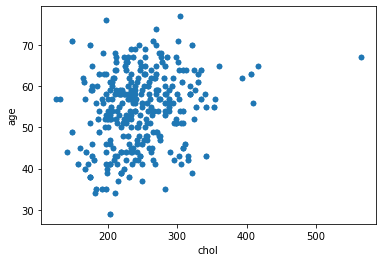

In [84]:
df.plot(x="chol", y="age",  kind="scatter")

In [85]:
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

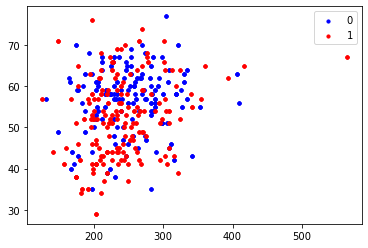

In [86]:
scatter_x1 = np.array(x_data['chol'])
scatter_x2 = np.array(x_data['age'])
group_val = y
cdict = {0: 'blue', 1: 'red'}

# fig, ax = pyplot.subplots()
# for g in np.unique(group_val):
#     ix = np.where(group_val == g)
#     ax.scatter(scatter_x1[ix], scatter_x2[ix], c = cdict[g], label = g, s = 100)
fig, ax = pyplot.subplots()
for g in np.unique(group_val):
    ix = np.where(group_val == g)
    ax.scatter(scatter_x1[ix], scatter_x2[ix], c = cdict[g], label = g, s = 10)

ax.legend() #OKok m ve them matric confusion, classification report, giong KNN cua t
pyplot.show()

In [87]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


In [88]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2,random_state=0)

In [90]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 85.85%


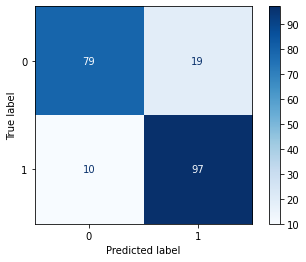

<Figure size 864x864 with 0 Axes>

In [91]:
plot_confusion_matrix(lr, x_test, y_test, cmap=pyplot.cm.Blues)  
pyplot.figure(figsize = (12, 12))
pyplot.show()

In [92]:
from sklearn.metrics import classification_report
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.84        98
           1       0.84      0.91      0.87       107

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



In [93]:
from sklearn.metrics import precision_score, recall_score
recall_s = recall_score(y_test, lr.predict(x_test), average=None)
print('Tỉ lệ dự đoán đúng người bị bệnh là ', recall_s[1])
print('Tỉ lệ dự đoán đúng người không bị bệnh là', recall_s[0])

Tỉ lệ dự đoán đúng người bị bệnh là  0.9065420560747663
Tỉ lệ dự đoán đúng người không bị bệnh là 0.8061224489795918


### Hàm Sigmoid
Hàm tính toán "hypothesis" cho logistic regression:

$$ h_\theta(x) = g(\theta^T x)$$

Hàm $g$ là hàm sigmoid, được định nghĩa: 

$$g(z) = \frac{1}{1+e^{-z}}$$



In [63]:
def sigmoid(z):

    z = np.array(z)
    
    g = np.zeros(z.shape)

    import math
    g = 1 / (1 + math.e**(-z))
    
    return g

### Logistic Regression

Hàm tính toán mất mát

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)} \log \left(h_\theta\left(x^{(i)} \right)\right) - \left( 1 - y^{(i)} \right) \log\left(1 - h_\theta \left(x^{(i)} \right) \right) \right] $$

Hàm tính toán $\theta_j$ 

$$
\begin{align*}
& 
& \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} \right)
\end{align*}
$$




In [64]:
# lưu chiều ma trận train model
m, n = x_train.shape

# Thêm một cột giá trị bias 1
x_train = np.concatenate([np.ones((m, 1)), x_train], axis=1)

In [65]:
def costFunction(theta, X, y):

    # Khởi tạo một số giá trị
    m = y.size  # Số lượng mẫu

    J = 0
    grad = np.zeros(theta.shape)

    
    ytp = np.transpose(y)
    ttp = np.transpose(theta)
    uni = (np.ones(y.shape))
    m = np.size(X,0)
    n = np.size(X,1)
    
    for i in range(m):
        J += -1/m *  (y[i] * np.log(sigmoid(np.dot(ttp,X[i]))) + (1-y[i]) * np.log(1 - sigmoid(np.dot( ttp, X[i]))))
       
    for i in range(n):
        tgrad = 0
        for j in range(m):
            tgrad += ( sigmoid(np.dot(ttp, X[j])) - y[j] ) * X[j,i]
        grad[i] = 1/m * tgrad

    return J, grad

#### Lựa chọn parameters với `scipy.optimize`

Đối với Logistic Regression ta cần tối ưu (minimize) $J(\theta)$ với parameter là $\theta$.
Sử dụng `optimize.minimize` để tìm ra parameters $\theta$ thích hợp nhất cho Hàm Lỗi (Cost function) với một dataset cho trước. Truyền vào hàm `optimize.minimize` Các tham số:
- `costFunction`: Hàm lỗi được định nghĩa với tham số $\theta$, tính toán "cost" của logistic regression theo $\theta$ với dataset cho trước (X, y). Chỉ truyền vào tên hàm mà không truyền vào biến. Mục đích là tìm được biến số $\theta$ phù hợp, không phải tính toán hàm.
- `initial_theta`: Theta truyền vào ban đầu, chỉ mang ý nghĩa định nghĩa theta.
- `(X, y)`: Các tham số bổ sung để tính toán hàm lỗi.
- `jac`:  Xác định liệu hàm truyền vào cần minimize (costFunction) có trả về Ma trận Jacobi (gradient) kèm theo giá trị hàm lỗi hay không (True)
- `method`: Phương pháp tối ưu được sử dụng (Ví dụ: TNC, CG, L-BFGS-B, ...)
- `options`: Các lựa chọn bổ sung thêm cho hàm. Ở đây ta sẽ thiết lập số iterator tối đa cho quá trình minimize


In [66]:
# khỏi tạo 1 giá trị theta ban đầu 
initial_theta = np.zeros(n+1)
    
# cài đặt options số lượng iterator tối đa cho việc optimize

options= {'maxiter': 400}
#Tối ưu hóa hàm này có thể dùng method TNC
res = optimize.minimize(costFunction,
                        initial_theta,
                        (x_train, y_train),
                        jac=True,
                        method='TNC',
                        options=options)

# giá trị fun của hàm optimize trả về là giá trị hàm costFunction 
cost = res.fun

# giá trị x trả về là giá trị theta tối ưu:
theta = res.x

print(cost)

print(theta)


0.3460560062327809
[ 1.32018862 -0.25139371 -1.72960168 -1.46576662 -2.3762466   0.12822114
  1.20494583  2.48337555 -0.75132221 -3.71292774 -3.01420179 -0.89017337
  0.2176871   1.07356151  0.96994315 -1.01509439  1.11270613  0.87441294
 -0.32941318  0.78591989  0.03007493  0.72044987]


In [67]:
m, n = x_test.shape
x_test = np.concatenate([np.ones((m, 1)), x_test], axis=1)

In [68]:
def predict(theta, X):
    
    m = X.shape[0] #Số lượng mẫu train


    p = np.zeros(m) # tạo array lưu kết quả dự đoán


    for i in range (m):
        tmp = sigmoid(np.dot(np.transpose(theta), X[i]))
        
        # với giá trị trả về của hàmn sigmoid < 0.5 ta đặt giá trị là 0
        if (tmp < 0.5): 
            p[i] = 0
        # với giá trị trả về của hàmn sigmoid >= 0.5 ta đặt giá trị là 0    
        else: 
            p[i] = 1

    return p

In [69]:
# Tính toán giá trị dự đoán
p = predict(theta, x_test)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y_test) * 100))

Train Accuracy: 84.88 %


#### Hàm Regularized Regression

Hàm tính toán mất mát

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)} \log \left(h_\theta\left(x^{(i)} \right)\right) - \left( 1 - y^{(i)} \right) \log\left(1 - h_\theta \left(x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Hàm tính toán $\theta_j$ 

$$
\begin{align*}
& \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)}  & \text{với  } j = 0 \\
& \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m} \theta_j & \text{với  } j  \ge 1
\end{align*}
$$


In [70]:
# hàm Regularize Regression với vòng lặp
def costFunctionReg(theta, X, y, lambda_):
    
    m = y.size 
    if y.dtype == bool:
        y = y.astype(int)
    J = 0
    grad = np.zeros(theta.shape)   
    tmpT = 0
    n = 0
    n = np.size(theta, 0) 
    cost, grad = costFunction(theta, X, y)
    for i in range (n):
        if (i == 0):
            continue
        tmpT += theta[i] * theta[i]
        
        grad[i] = grad[i] + lambda_/m * theta[i]
    J = cost + lambda_ * tmpT /(2*m)
            
    return J, grad

In [71]:
# khởi tạo theta ban đầu
initial_theta = np.zeros(x_train.shape[1])

#đặt lambda_ = 1 (có thể tùy chỉnh)
lambda_ = 1
# cài đặt options số lượng iterator tối đa cho việc optimize
options= {'maxiter': 400}

#Tối ưu hóa hàm này có thể dùng method TNG

res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (x_train, y_train, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

# giá trị fun của hàm optimize trả về là giá trị hàm costFunction 
cost = res.fun

# giá trị x trả về là giá trị theta tối ưu:
theta = res.x



p = predict(theta, x_test)

print('Train Accuracy: %.2f %%' % (np.mean(p == y_test) * 100))

Train Accuracy: 85.85 %


#### Vector hóa hàm tính toán mất mát 

Hàm tính toán đặt là J, tham số theta (các trọng số cho phương trình hypothesis)


$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)} \log \left(h_\theta\left(x^{(i)} \right)\right) - \left( 1 - y^{(i)} \right) \log\left(1 - h_\theta \left(x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Có dạng của X và theta như sau:

$$ X = \begin{bmatrix} - \left( x^{(1)} \right)^T - \\ - \left( x^{(2)} \right)^T - \\ \vdots \\ - \left( x^{(m)} \right)^T - \end{bmatrix} \qquad \text{and} \qquad \theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \vdots \\ \theta_n \end{bmatrix} $$

Khi đó ta có:

$$ X\theta = \begin{bmatrix} - \left( x^{(1)} \right)^T\theta - \\ - \left( x^{(2)} \right)^T\theta - \\ \vdots \\ - \left( x^{(m)} \right)^T\theta - \end{bmatrix} $$

Với a, b là các vector thì  $a^Tb = b^Ta$ if $a$ and $b$ . Do đó ta có thể biến đổi phương trình trên thành $\theta^T x^{(i)}$ .

$$ X\theta = \begin{bmatrix} - \left( x^{(1)} \right)^T\theta - \\ - \left( x^{(2)} \right)^T\theta - \\ \vdots \\ - \left( x^{(m)} \right)^T\theta - \end{bmatrix} = \begin{bmatrix} - \theta^T x^{(1)}  - \\ - \theta^T x^{(2)} - \\ \vdots \\ - \theta^T x^{(m)}  - \end{bmatrix} $$

#### Vector hóa tính toán Gradient

Công thức tính toán Gradient cho giá trị ở vị trí $j^{th}$:

$$ \begin{align*}
& \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)}  & \text{for } j = 0 \\
& \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta\left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m} \theta_j & \text{for } j  \ge 1
\end{align*} $$

Theo dạng ma trận ta có $\theta_j$:

$$
\begin{align*}
\begin{bmatrix} 
\frac{\partial J}{\partial \theta_0} \\
\frac{\partial J}{\partial \theta_1} \\
\frac{\partial J}{\partial \theta_2} \\
\vdots \\
\frac{\partial J}{\partial \theta_n}
\end{bmatrix} = &
\frac{1}{m} \begin{bmatrix}
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_0^{(i)}\right) \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_1^{(i)}\right) \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_2^{(i)}\right) \\
\vdots \\
\sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x_n^{(i)}\right) \\
\end{bmatrix} \\
= & \frac{1}{m} \sum_{i=1}^m \left( \left(h_\theta\left(x^{(i)}\right) - y^{(i)} \right)x^{(i)}\right) \\
= & \frac{1}{m} X^T \left( h_\theta(x) - y\right)
\end{align*}
$$

với

$$  h_\theta(x) - y = 
\begin{bmatrix}
h_\theta\left(x^{(1)}\right) - y^{(1)} \\
h_\theta\left(x^{(2)}\right) - y^{(2)} \\
\vdots \\
h_\theta\left(x^{(m)}\right) - y^{(m)} 
\end{bmatrix} $$

Với $x^{(i)}$ là vector và $h_\theta\left(x^{(i)}\right) - y^{(i)}$  là các giá trị số cụ thể.
Để rõ hơn với phép đạo hàm ta sẽ đặt $\beta_i = (h_\theta\left(x^{(m)}\right) - y^{(m)})$ và thực hiện:

$$ \sum_i \beta_ix^{(i)} = \begin{bmatrix} 
| & | & & | \\
x^{(1)} & x^{(2)} & \cdots & x^{(m)} \\
| & | & & | 
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_m
\end{bmatrix} = x^T \beta
$$

Với $\beta_i = \left( h_\theta(x^{(i)} - y^{(i)} \right)$.

Dựa trên các biến đổi trên ta có thể thực hiện tính toán mà không sử dụng các vòng lặp

In [72]:
# hàm Regularize Regression được vector hóa
def lrCostFunction(theta, X, y, lambda_):
    m = y.size
    # chuyển đổi dạng giá trị đầu ra thành int nếu ban đầu là boolean
    if y.dtype == bool:
        y = y.astype(int)
    J = 0
    grad = np.zeros(theta.shape)
    
     
    log_sigmoid = np.log(sigmoid(np.dot(X, theta )))
    
    log_sigmoid_minus = np.log(1 - sigmoid(np.dot(X, theta)))    
    
    tmp = - np.multiply(y,log_sigmoid) - np.multiply((1-y), log_sigmoid_minus)
    
    square_theta = np.square(theta)
    
    square_theta[0] = 0    

    J = (np.sum(tmp) / m) + lambda_  * np.sum(square_theta) / 2 / m
    
    tmp_theta = theta
    
    grad = np.dot( sigmoid(np.dot(X, theta )) - y, X) / m
    
    tmp_theta[0] = 0
       
    grad += lambda_ * tmp_theta / m

   
    return J, grad

In [73]:
# khởi tạo theta ban đầu
initial_theta = np.zeros(x_train.shape[1])

# đặt giá trị ban đầu lamda = 1
lambda_ = 1

# set options for optimize.minimize
options= {'maxiter': 50}

#Tối ưu hóa hàm này cần dùng method = 'CG' để đạt kết quả tốt nhất

res = optimize.minimize(lrCostFunction,
                        initial_theta,
                        (x_train, y_train, lambda_),
                        jac=True,
                        method='CG',
                        options=options)

cost = res.fun

theta = res.x


# tính toán độ chính xác
p = predict(theta, x_test)

print('Train Accuracy: %.2f %%' % (np.mean(p == y_test) * 100))

Train Accuracy: 85.85 %


# Phân loại nhiều lớp

In [47]:
with open('preprocessing/cirrhosis/X.pkl', 'br') as f:
    x = pickle.load(f)

with open('preprocessing/cirrhosis/y.pkl', 'rb') as f:
    y = pickle.load(f)

num_labels = 4
x['Prothrombin']

0      0.369565
1      0.195652
2      0.347826
3      0.163043
4      0.228261
         ...   
407    0.228261
408    0.260870
409    0.119565
410    0.173913
411    0.195652
Name: Prothrombin, Length: 412, dtype: float64

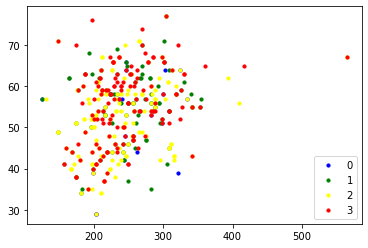

In [48]:
scatter_x1 = np.array(x_data['chol'])
scatter_x2 = np.array(x_data['age'])
group_val = y
cdict = {0: 'blue', 1: 'green', 2: 'yellow', 3: 'red'}

# fig, ax = pyplot.subplots()
# for g in np.unique(group_val):
#     ix = np.where(group_val == g)
#     ax.scatter(scatter_x1[ix], scatter_x2[ix], c = cdict[g], label = g, s = 100)
fig, ax = pyplot.subplots()
for g in np.unique(group_val):
    ix = np.where(group_val == g)
    ax.scatter(scatter_x1[ix], scatter_x2[ix], c = cdict[g], label = g, s = 10)

ax.legend()
pyplot.show()

In [122]:
# #  Load dữ liệu
# num_labels = 5

# df = pd.read_csv("./data/drug200.csv")

# df = df.replace({'Sex': {'F': 1, 'M': 0}})
# df = df.replace({'Drug' : {'DrugA': 0, 'drugA': 0, 
#                            'DrugB' : 1, 'drugB' : 1,
#                            'DrugC' : 2, 'drugC' : 2,
#                            'DrugX' : 3, 'drugX' : 3,
#                             'DrugY' : 4, 'drugY' : 4}
#                 })

# df = df.replace({'BP': {'HIGH': 2, 'NORMAL': 1, 'LOW': 0}})
# df = df.replace({'Cholesterol': {'HIGH': 1, 'NORMAL': 0}})
# y = df.Drug.values
# x = df.drop(['Drug'], axis = 1)

# df.head()


In [123]:
x = (x - np.min(x)) / (np.max(x) - np.min(x)).values

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [125]:
accuracies = {}

lr = LogisticRegression(max_iter=200)
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 60.24%


In [130]:
# Sử dụng phương pháp "One vs All" để thực hiện phân loại nhiều lớp với Logistic Regression

def oneVsAll(X, y, num_labels, lambda_):
   


    # lưu chiều của X
    m, n = X.shape
    
    # khởi tạo ma trận lưu giá trị các theta
    all_theta = np.zeros((num_labels, n + 1))

    # thêm cột giá trị 1 vào X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    
    for c in range (num_labels):
    
        # khởi tạo giá trị theta ban đầu
        initial_theta = np.zeros(n + 1)
      
        # đặt số iterator max
        options = {'maxiter': 50}
        # Sử dụng hàm optimize và đặt y==c để tạo một vector có giá trị 0, 1 chỉ
        # chỉ ra lớp nào có giá trị 1 (đúng) để tối ưu theta theo lớp đó
        res = optimize.minimize(lrCostFunction, 
                                initial_theta, 
                                (X, (y == c), lambda_), 
                                jac=True, 
                                method='CG',
                                options=options) 
        all_theta[c] = res.x

 
    return all_theta

In [131]:
lambda_ = 0.1
all_theta = oneVsAll(x_train, y_train, num_labels, lambda_)

In [132]:
def predictOneVsAll(all_theta, X):
    
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    # khởi tạo vector 0 p
    p = np.zeros(m)

    # Thêm cột giá trị 1 cho X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    
    #lưu giá trị tính toán kết quả vào p
    
    p = X @ all_theta.T
    
    # lúc này p là 1 array có các giá trị (xác suất chính xác) của các lớp,
    # ta cần lấy ra index trong từng dòng của p, index đó
    # chính là lớp được dự đoán
    
    p = np.argmax(p,axis=1) 
        
    return p

In [133]:
pred = predictOneVsAll(all_theta, x_test)
print('Training Set Accuracy: {:.2f}%'.format(np.mean(pred == y_test) * 100))

Training Set Accuracy: 61.45%
